In [17]:
import cv2
import torch
import matplotlib.pyplot as plt
import tqdm as notebook_tqdm

from transforms import load_augs
from omegaconf import OmegaConf
from albumentations.core.transforms_interface import ImageOnlyTransform



In [18]:
#transform to re-normalize the image for visualization

class RestoreToRGBArray(ImageOnlyTransform):
    def __init__(
        self,
        mean=(0.485, 0.456, 0.406),
        std=(0.229, 0.224, 0.225),
        max_pixel_value=255.0,
        always_apply=False,
        p=1.0,
    ):
        super(RestoreToRGBArray, self).__init__(always_apply, p)
        device = "cuda:0" if torch.cuda.is_available() else "cpu"
        self.mean = torch.tensor(mean, device=device)
        self.std = torch.tensor(std, device=device)

        self.max_pixel_value = max_pixel_value

    def apply(self, image, **params):
        if len(image.shape) == 4:
            image = image.permute(0, 2, 3, 1)
        elif len(image.shape) == 3:
            image = image.permute(1, 2, 0)
        image = (image * self.std) + self.mean
        return (image * self.max_pixel_value).byte()

    def get_transform_init_args_names(self):
        return ("mean", "std", "max_pixel_value")

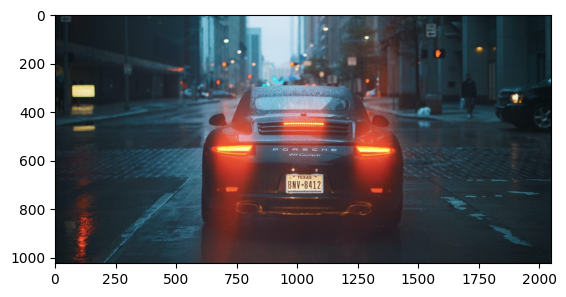

In [53]:
augmentations = dict()
augmentations["Base"] = "transformations/base_cityscapes.yaml"
augmentations["Distort"] = "transformations/cs_distort.yaml" 
augmentations["AutoAlbum"] = "transformations/cs_autoaug.yaml" 
augmentations["GausBlur"] = "transformations/cs_blur_gaus.yaml" 
augmentations["NOise"]= "transformations/cs_noise.yaml" 


renormalize = RestoreToRGBArray()
image = cv2.imread("sample.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.show()

------------------------------------------------Base------------------------------------------------


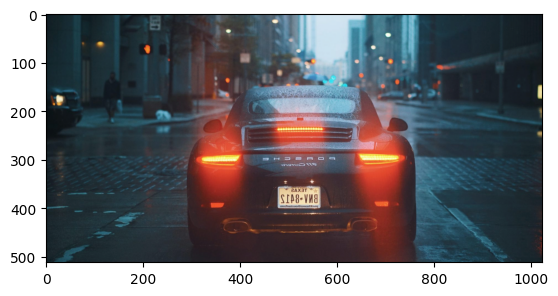

----------------------------------------------Distort-----------------------------------------------


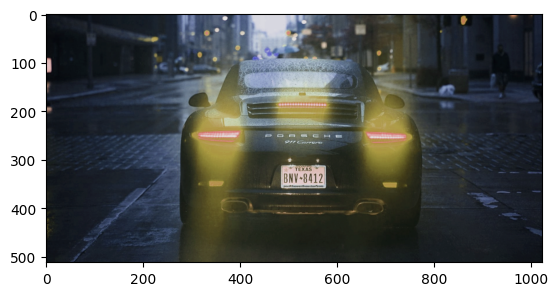

---------------------------------------------AutoAlbum----------------------------------------------


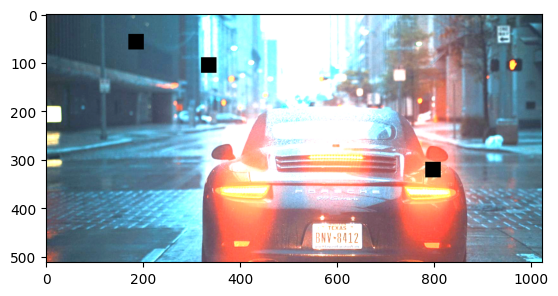

----------------------------------------------GausBlur----------------------------------------------


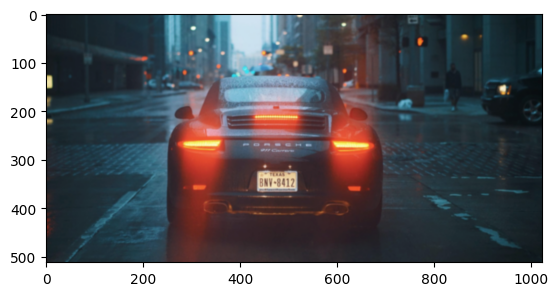

-----------------------------------------------NOise------------------------------------------------


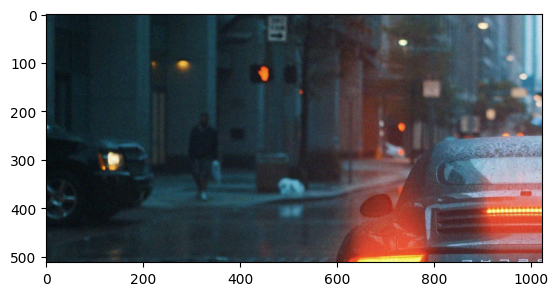

In [56]:

for name, config_path in augmentations.items():
    conf = OmegaConf.load(config_path)
    train_transform = load_augs(conf.train.augs)
    transformed_image = train_transform(image=image)
    renormalized_image = renormalize(image=transformed_image["image"])
    print(name.center(100, "-"))
    plt.imshow(renormalized_image["image"])
    plt.show()